In [1]:
%matplotlib inline

![pymatgen](https://camo.qiitausercontent.com/0a13a0de0e197ddde92a8704ab970b151877937c/68747470733a2f2f71696974612d696d6167652d73746f72652e73332e616d617a6f6e6177732e636f6d2f302f3134363536352f37663331353836372d623236362d336136612d393964332d6338373238376562383332302e706e67)

periodic table模組提供了以下幾種類別
#  Element

In [2]:
import pymatgen as mg

symbol = "Si"
elm = mg.Element(symbol)
print(elm.atomic_mass)
print(elm.atomic_mass.to("kg"))
print(elm.atomic_radius)
print(elm.melting_point)
print(elm.ionic_radii)
elec_structure = elm.full_electronic_structure
print(elec_structure)

28.0855 amu
4.66370699549943e-26 kg
1.1 ang
1687.0 K
{4: 0.54}
[(1, 's', 2), (2, 's', 2), (2, 'p', 6), (3, 's', 2), (3, 'p', 2)]


# Specie

In [3]:
import pymatgen as mg

fe2 = mg.Specie("Fe", 2)
print(fe2.atomic_mass)
print(fe2.ionic_radius)

55.845 amu
0.92 ang


# Composition

In [4]:
import pymatgen as mg

comp = mg.Composition("Fe2O3")
print("Weight of Fe2O3 is ", comp.weight)
print("Amount of Fe in Fe2O3 is ", comp["Fe"])
print("Atomic fraction of Fe is ", comp.get_atomic_fraction("Fe"))
print("Weight fraction of Fe is ", comp.get_wt_fraction("O"))

Weight of Fe2O3 is  159.6882 amu
Amount of Fe in Fe2O3 is  2.0
Atomic fraction of Fe is  0.4
Weight fraction of Fe is  0.300574494546247 


# Lattice & Structure

In [5]:
import pymatgen as mg

# http://pymatgen.org/pymatgen.core.structure.html?highlight=structure#module-pymatgen.core.structure
lattice = mg.Lattice.cubic(4.2)
print(lattice.lengths_and_angles)

lat = mg.Lattice.hexagonal(3.6,4.6)
print(lat.lengths)

## Structure object represents a crystal structure (lattice + basis)
structure = mg.Structure(lattice, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
print(structure.volume)

print("First site of the structure is ",structure[0])

((4.2, 4.2, 4.2), (90.0, 90.0, 90.0))
(3.6, 3.6, 4.6)
74.08800000000001
First site of the structure is  [0. 0. 0.] Cs


D:\anaconda3\envs\tensorflow1\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: lengths_and_angles is deprecated
Use Lattice.parameters instead. This will be removed in v2020.*
  """


In [6]:
# You can create a Structure using spacegroup symmetry as well.
li2o = mg.Structure.from_spacegroup("Fm-3m", mg.Lattice.cubic(3), ["Li", "O"], [[0.25, 0.25, 0.25], [0, 0, 0]])

# Input/output

In [7]:
structure.to(fmt="poscar")
structure.to(filename="POSCAR")
structure.to(filename="CsCl.cif")

print(structure.to(fmt="poscar"))

print(structure.to(fmt="cif"))

li2o.to(filename="Li2O.cif")

Cs1 Cl1
1.0
4.200000 0.000000 0.000000
0.000000 4.200000 0.000000
0.000000 0.000000 4.200000
Cs Cl
1 1
direct
0.000000 0.000000 0.000000 Cs
0.500000 0.500000 0.500000 Cl

# generated using pymatgen
data_CsCl
_symmetry_space_group_name_H-M   'P 1'
_cell_length_a   4.20000000
_cell_length_b   4.20000000
_cell_length_c   4.20000000
_cell_angle_alpha   90.00000000
_cell_angle_beta   90.00000000
_cell_angle_gamma   90.00000000
_symmetry_Int_Tables_number   1
_chemical_formula_structural   CsCl
_chemical_formula_sum   'Cs1 Cl1'
_cell_volume   74.08800000
_cell_formula_units_Z   1
loop_
 _symmetry_equiv_pos_site_id
 _symmetry_equiv_pos_as_xyz
  1  'x, y, z'
loop_
 _atom_site_type_symbol
 _atom_site_label
 _atom_site_symmetry_multiplicity
 _atom_site_fract_x
 _atom_site_fract_y
 _atom_site_fract_z
 _atom_site_occupancy
  Cs  Cs0  1  0.00000000  0.00000000  0.00000000  1
  Cl  Cl1  1  0.50000000  0.50000000  0.50000000  1



In [8]:
# Reading a structure is easy.
structure = mg.Structure.from_file("CsCl.cif")
print(structure)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  Cl    0.5  0.5  0.5


In [9]:
# Changing the specie of a site.
structure[1] = "F"
print(structure)

Full Formula (Cs1 F1)
Reduced Formula: CsF
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP      a    b    c
---  ----  ---  ---  ---
  0  Cs    0    0    0
  1  F     0.5  0.5  0.5


In [10]:
# Changes species and coordinates (fractional assumed for structures)
structure[1] = "Cl", [0.51, 0.51, 0.51]
print(structure)

Full Formula (Cs1 Cl1)
Reduced Formula: CsCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  Cs    0     0     0
  1  Cl    0.51  0.51  0.51


In [11]:
# Replaces all Cs in the structure with K
structure["Cs"] = "K"
print(structure)

Full Formula (K1 Cl1)
Reduced Formula: KCl
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP       a     b     c
---  ----  ----  ----  ----
  0  K     0     0     0
  1  Cl    0.51  0.51  0.51


In [12]:
# Replaces all K in the structure with K: 0.5, Na: 0.5, i.e., a disordered structure is created.
structure["K"] = "K0.5Na0.5"
print(structure)

Full Formula (K0.5 Na0.5 Cl1)
Reduced Formula: K0.5Na0.5Cl1
abc   :   4.200000   4.200000   4.200000
angles:  90.000000  90.000000  90.000000
Sites (2)
  #  SP                    a     b     c
---  -----------------  ----  ----  ----
  0  K:0.500, Na:0.500  0     0     0
  1  Cl                 0.51  0.51  0.51


In [13]:
## http://pymatgen.org/modules.html

import pymatgen as mg

API_key="MTF9psiegrAP0BmZ"

# Material

In [14]:
## http://pymatgen.org/pymatgen.ext.matproj.html
from pymatgen import MPRester
from pprint import pprint

with mg.MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)
    # The return object is list of dict
    pprint(data)

# The general format is as follows:
#[{“material_id”: material_id, “property_name” : value}, …]

[{'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_LuAl2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.48873961\n'
         '_cell_length_b   5.48873961\n'
         '_cell_length_c   5.48873961\n'
         '_cell_angle_alpha   60.00000000\n'
         '_cell_angle_beta   60.00000000\n'
         '_cell_angle_gamma   60.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   LuAl2\n'
         "_chemical_formula_sum   'Lu2 Al4'\n"
         '_cell_volume   116.92379067\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_o

# Bandstructure

number of bands 36
False
False
band gap {'direct': False, 'energy': 3.5766, 'transition': '(0.333,-0.000,0.000)-\\Gamma'}
{<Spin.up: 1>: array([[-14.5246, -14.5209, -14.5101, ..., -14.5069, -14.5202, -14.5246],
       [-11.297 , -11.2991, -11.3054, ..., -11.3719, -11.3321, -11.297 ],
       [-11.2915, -11.2904, -11.2872, ..., -11.2461, -11.263 , -11.2915],
       ...,
       [ 21.158 ,  21.1901,  21.2712, ...,  21.1679,  21.1619,  21.158 ],
       [ 21.9041,  21.919 ,  21.9585, ...,  21.8899,  21.908 ,  21.903 ],
       [ 23.1195,  23.1033,  23.1641, ...,  23.1077,  23.2888,  23.1822]])}
(36, 191)
[-0.7098 -0.7125 -0.7205 -0.7343 -0.7541 -0.7808 -0.8154 -0.8597 -0.9154
 -0.984  -1.0653 -1.1565 -1.2525 -1.3478 -1.4374 -1.5183 -1.5887 -1.6481
 -1.6964 -1.6907 -1.568  -1.4429 -1.3175 -1.1941 -1.1941 -1.3374 -1.5093
 -1.4345 -1.2938 -1.2034 -1.1891 -1.2104 -1.246  -1.29   -1.3409 -1.3409
 -1.3961 -1.4569 -1.5235 -1.5179 -1.5325 -1.5695 -1.6152 -1.5929 -1.574
 -1.5691 -1.5732 -1.5806 -1.586

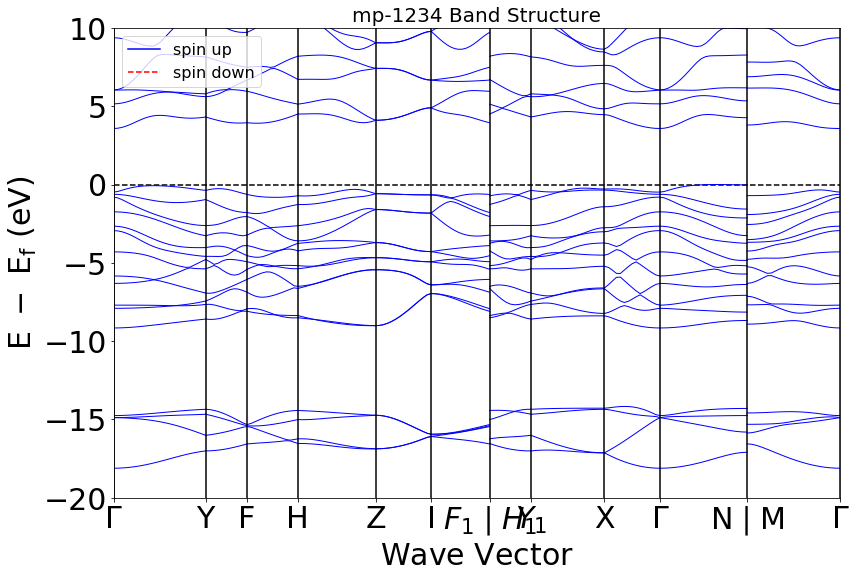

In [15]:
# http://pymatgen.org/pymatgen.electronic_structure.bandstructure.html
from pymatgen import MPRester
from pymatgen import Spin
from pymatgen.io.vasp.outputs import BSVasprun, Vasprun
from pymatgen.electronic_structure.plotter import BSPlotter, BSDOSPlotter, DosPlotter
import matplotlib.pyplot as plt

with mg.MPRester(API_key) as m:
    # Bandstructure for material id
    bandstructure = m.get_bandstructure_by_material_id("mp-344")
    print(bandstructure)
    print("number of bands", bandstructure.nb_bands)
    print(bandstructure.is_metal())
    print(bandstructure.is_spin_polarized)
    print("band gap", bandstructure.get_band_gap())
    
    # BaandStructure物件有個bands的性質，儲存所有的能帶結構，他的shape是(dictionnary of arrays)
    # {Spin.up: np.array((nb_bands, nb_kpoints)), Spin.down: np.array((nb_bands, nb_kpoints))}
    print(bandstructure.bands)
    print(bandstructure.bands[Spin.up].shape)
    # The 9th bands of spin up
    print(bandstructure.bands[Spin.up][9, :])
    
    bsplot = BSPlotter(bandstructure)
    # get the plot
    bsplot.get_plot(ylim=(-20, 10), zero_to_efermi=True)
    print(bandstructure.efermi)
    # add some features
    ax = plt.gca()
    ax.set_title("mp-1234 Band Structure", fontsize=20)
    xlim = ax.get_xlim()
    ax.hlines(0, xlim[0], xlim[1], linestyles="dashed", color="black")

    # add legend
    ax.plot((), (), "b-", label="spin up")
    ax.plot((), (), "r--", label="spin down")
    ax.legend(fontsize=16, loc="upper left")

# Phase Diagram

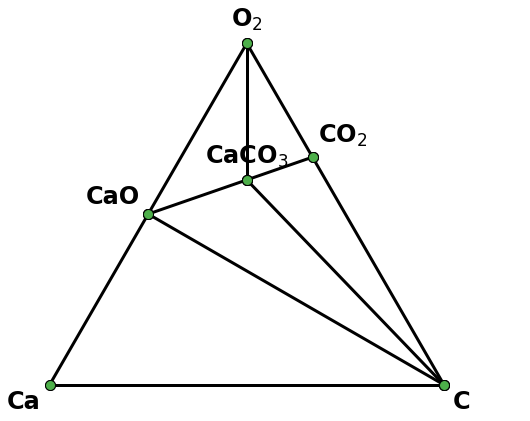

In [16]:
from pymatgen import MPRester
from pymatgen.analysis.phase_diagram import PhaseDiagram, PDPlotter

#This initializes the REST adaptor. Put your own API key in.

with mg.MPRester(API_key) as m: 
#Entries are the basic unit for thermodynamic and other analyses in pymatgen.
#This gets all entries belonging to the chemical system.
    entries = m.get_entries_in_chemsys(['C', 'Ca', 'O'])

#With entries, you can do many sophisticated analyses, 
#like creating phase diagrams.
    pd = PhaseDiagram(entries)
    plotter = PDPlotter(pd, show_unstable=False)
    plotter.show() 

## Handson

1. 使用MPRester類別中提供的其他方法(get_structures，get_bandstructure_by_material_id...)來抓取任意一筆資料。 

2. 畫出mp-344的bandstructure，他的band_gap_energy為何?

3. 畫出Si-C system的相圖

4. 畫出Ca-C-O system的相圖

# Using pymatgen's MPRester high-level methods

* Formulae, e.g., "Li2O", "Fe2O3", "*TiO3
* Chemical systems, e.g., "Li-Fe-O", "*-Fe-O"
* Materials ids, e.g., "mp-1234"

In [17]:
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.get_data("Li-Fe-O")
    pprint(data)

[{'band_gap': 1.1424999999999996,
  'cif': '# generated using pymatgen\n'
         'data_Li5(FeO2)4\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.07466907\n'
         '_cell_length_b   6.07466907\n'
         '_cell_length_c   6.07466930\n'
         '_cell_angle_alpha   59.88326844\n'
         '_cell_angle_beta   59.88326844\n'
         '_cell_angle_gamma   59.88327071\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li5(FeO2)4\n'
         "_chemical_formula_sum   'Li5 Fe4 O8'\n"
         '_cell_volume   158.08880925\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_

         '  Li  Li0  1  0.50000000  0.21289200  0.49999400  1\n'
         '  Li  Li1  1  0.00000000  0.71289700  0.24999700  1\n'
         '  Li  Li2  1  0.50000000  0.21289700  0.00000200  1\n'
         '  Li  Li3  1  0.99999900  0.71289300  0.75000500  1\n'
         '  Li  Li4  1  0.99999900  0.28710800  0.75000400  1\n'
         '  Li  Li5  1  0.50000000  0.78710900  0.49999400  1\n'
         '  Li  Li6  1  0.99999900  0.28710400  0.24999600  1\n'
         '  Li  Li7  1  0.49999900  0.78710400  0.00000200  1\n'
         '  Fe  Fe8  1  0.99998700  0.00000100  0.25000600  1\n'
         '  Fe  Fe9  1  0.49997900  0.49999600  0.00000000  1\n'
         '  Fe  Fe10  1  0.50000400  0.49999700  0.50001100  1\n'
         '  Fe  Fe11  1  0.00003500  0.99999800  0.75000100  1\n'
         '  O  O12  1  0.00000000  0.64507600  0.49998500  1\n'
         '  O  O13  1  0.49999900  0.14507900  0.25000600  1\n'
         '  O  O14  1  0.00000100  0.64507800  0.99999000  1\n'
         '  O  O15  1  0.4

                 'source': 'spglib',
                 'symbol': 'C2/m',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-1177943',
               'mp-1273374',
               'mp-1273082',
               'mp-1273206',
               'mp-1283667',
               'mp-1291451',
               'mp-1282589',
               'mp-1285945',
               'mp-1278201',
               'mp-1283766',
               'mp-1277124',
               'mp-1291597',
               'mp-1284953',
               'mp-1284983',
               'mp-1288379',
               'mp-1296190',
               'mp-1289563',
               'mp-1294048',
               'mp-1288492',
               'mp-1274083',
               'mp-1288580',
               'mp-1276346',
               'mp-1281941',
               'mp-1278628',
               'mp-1281990',
               'mp-1283113',
               'mp-1295383',
               'mp-1285486',
               'mp-1298833',
               'mp-1274392',
          

                 'number': 34,
                 'point_group': 'mm2',
                 'source': 'spglib',
                 'symbol': 'Pnn2',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-782697',
               'mp-893103',
               'mp-904480',
               'mp-905878',
               'mp-755242',
               'mp-1374317'],
  'total_magnetization': 7.00770635,
  'unit_cell_formula': {'Fe': 4.0, 'Li': 6.0, 'O': 12.0},
  'volume': 205.42847231033895},
 {'band_gap': 1.6018,
  'cif': '# generated using pymatgen\n'
         'data_LiFe2O3\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   3.04799551\n'
         '_cell_length_b   5.29400437\n'
         '_cell_length_c   7.40969189\n'
         '_cell_angle_alpha   88.45878844\n'
         '_cell_angle_beta   89.99113363\n'
         '_cell_angle_gamma   89.99572598\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   LiFe2O3\n'
         "_chemica

         '  O  O17  1  0.80422500  0.57132000  0.91910300  1\n'
         '  O  O18  1  0.69577500  0.57132000  0.58089700  1\n'
         '  O  O19  1  0.75000000  0.59684800  0.25000000  1\n',
  'density': 3.7191245655198095,
  'diel': None,
  'e_above_hull': 0.14001617420000034,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -111.95026679,
  'energy_per_atom': -5.5975133395,
  'formation_energy_per_atom': -1.5210700795833325,
  'full_formula': 'Li4Fe4O12',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-756941',
  'nelements': 3,
  'nsites': 20,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'LiFeO3',
  'spacegroup': {'crystal_system': 'orthorhombic',
                 'hall': '-P 2a 2bc',
                 'number': 52,
                 'point_group': 'mmm',
                 'source': 'spglib',
                 'symbol': 'Pnna',
                 's

  'unit_cell_formula': {'Fe': 2.0, 'Li': 2.0, 'O': 4.0},
  'volume': 74.3879115337108},
 {'band_gap': 2.5120000000000005,
  'cif': '# generated using pymatgen\n'
         'data_Li8Fe2O7\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   10.01925800\n'
         '_cell_length_b   7.84505100\n'
         '_cell_length_c   9.32621553\n'
         '_cell_angle_alpha   71.99826939\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   90.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li8Fe2O7\n'
         "_chemical_formula_sum   'Li32 Fe8 O28'\n"
         '_cell_volume   697.17024331\n'
         '_cell_formula_units_Z   4\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
       

 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li3Fe3O8\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.86132941\n'
         '_cell_length_b   5.86132941\n'
         '_cell_length_c   9.90665100\n'
         '_cell_angle_alpha   90.00000000\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   119.99999335\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3Fe3O8\n'
         "_chemical_formula_sum   'Li6 Fe6 O16'\n"
         '_cell_volume   294.74726495\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _

                 'source': 'spglib',
                 'symbol': 'P2_1/c',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-771402',
               'mp-803665',
               'mp-811940',
               'mp-812579',
               'mp-770834',
               'mp-828666',
               'mp-832488',
               'mp-833202',
               'mp-1354183'],
  'total_magnetization': 1.000336125,
  'unit_cell_formula': {'Fe': 4.0, 'Li': 20.0, 'O': 16.0},
  'volume': 407.1530889367036},
 {'band_gap': 1.8934000000000002,
  'cif': '# generated using pymatgen\n'
         'data_LiFeO2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.25793700\n'
         '_cell_length_b   10.78418100\n'
         '_cell_length_c   13.48683000\n'
         '_cell_angle_alpha   90.00000000\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   90.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural  

         'data_LiFeO3\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.61594526\n'
         '_cell_length_b   6.61594526\n'
         '_cell_length_c   5.99167024\n'
         '_cell_angle_alpha   76.76104320\n'
         '_cell_angle_beta   76.76104320\n'
         '_cell_angle_gamma   25.13909724\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   LiFeO3\n'
         "_chemical_formula_sum   'Li2 Fe2 O6'\n"
         '_cell_volume   108.30220626\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.50000000  0.5000

  'spacegroup': {'crystal_system': 'cubic',
                 'hall': '-P 4 2 3',
                 'number': 221,
                 'point_group': 'm-3m',
                 'source': 'spglib',
                 'symbol': 'Pm-3m',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-1185320', 'mp-1414620'],
  'total_magnetization': 4.6976996,
  'unit_cell_formula': {'Fe': 1.0, 'Li': 1.0, 'O': 3.0},
  'volume': 53.878919459443516},
 {'band_gap': 0.3228,
  'cif': '# generated using pymatgen\n'
         'data_Li7FeO6\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.54504545\n'
         '_cell_length_b   5.64013693\n'
         '_cell_length_c   5.58293822\n'
         '_cell_angle_alpha   119.56758864\n'
         '_cell_angle_beta   120.06141473\n'
         '_cell_angle_gamma   60.65642150\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li7FeO6\n'
         "_chemical_formula_sum   'Li7 Fe1 O6'\n"
         '

         'data_Li3(FeO3)2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.53965509\n'
         '_cell_length_b   5.86876598\n'
         '_cell_length_c   6.00960841\n'
         '_cell_angle_alpha   90.89054340\n'
         '_cell_angle_beta   104.31336418\n'
         '_cell_angle_gamma   76.96642298\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3(FeO3)2\n'
         "_chemical_formula_sum   'Li6 Fe4 O12'\n"
         '_cell_volume   217.53217815\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.001416

  'tags': [],
  'task_ids': ['mp-764889',
               'mp-800853',
               'mp-806673',
               'mp-808089',
               'mp-1339915',
               'mp-1659787'],
  'total_magnetization': 5.0000577,
  'unit_cell_formula': {'Fe': 5.0, 'Li': 9.0, 'O': 12.0},
  'volume': 243.2106146054753},
 {'band_gap': 1.5984999999999998,
  'cif': '# generated using pymatgen\n'
         'data_Li4Fe2O5\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.59099900\n'
         '_cell_length_b   7.76355100\n'
         '_cell_length_c   12.09723762\n'
         '_cell_angle_alpha   64.89144951\n'
         '_cell_angle_beta   90.00000000\n'
         '_cell_angle_gamma   90.00000000\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li4Fe2O5\n'
         "_chemical_formula_sum   'Li16 Fe8 O20'\n"
         '_cell_volume   475.47438007\n'
         '_cell_formula_units_Z   4\n'
         'loop_\n'
         ' _symmetry_equiv_po

  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-1638858',
  'nelements': 3,
  'nsites': 46,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li8(FeO2)5',
  'spacegroup': {'crystal_system': 'triclinic',
                 'hall': 'P 1',
                 'number': 1,
                 'point_group': '1',
                 'source': 'spglib',
                 'symbol': 'P1',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-1645886',
               'mp-1649501',
               'mp-1650480',
               'mp-1644096',
               'mp-1649966',
               'mp-1646393',
               'mp-1638858',
               'mp-1648862',
               'mp-1642114',
               'mp-1642594',
               'mp-1648473'],
  'total_magnetization': 2.9931743,
  'unit_cell_formula': {'Fe': 10.0, 'Li': 16.0, 'O': 20.0},
  'volume': 524.8203391399568},
 {'band_gap': 0.24139999999999995,
  'cif': '# generated using pymatgen\n'
         'data_Li3FeO3\n

                                              78.55868189840648]],
                 'homogeneous_poisson': 0.24,
                 'nsites': 24,
                 'poisson_ratio': 0.24,
                 'universal_anisotropy': 0.79,
                 'warnings': []},
  'elements': ['Li', 'Fe', 'O'],
  'energy': -136.33002238,
  'energy_per_atom': -5.680417599166667,
  'formation_energy_per_atom': -1.9652277403472216,
  'full_formula': 'Li8Fe4O12',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-774155',
  'nelements': 3,
  'nsites': 24,
  'oxide_type': 'oxide',
  'piezo': {'eij_max': 0.464365904540805,
            'piezoelectric_tensor': [[0.0,
                                      0.0,
                                      0.0,
                                      0.08031999999999999,
                                      0.0,
                                      -0.1790199999999999

         '  O  O25  1  0.34103739  0.07127582  0.92352593  1\n'
         '  O  O26  1  0.53984669  0.78569618  0.36760775  1\n'
         '  O  O27  1  0.51813970  0.63175054  0.76435181  1\n'
         '  O  O28  1  0.48186030  0.36824946  0.23564819  1\n'
         '  O  O29  1  0.46015331  0.21430382  0.63239225  1\n'
         '  O  O30  1  0.65896261  0.92872418  0.07647407  1\n'
         '  O  O31  1  0.79686425  0.48996075  0.10005288  1\n'
         '  O  O32  1  0.87584549  0.63600859  0.64932732  1\n'
         '  O  O33  1  0.95334028  0.81379649  0.26624940  1\n'
         '  O  O34  1  0.76300759  0.25150066  0.48622065  1\n'
         '  O  O35  1  0.84540967  0.06348823  0.90966741  1\n',
  'density': 2.8855044946292043,
  'diel': None,
  'e_above_hull': 0.10229038326389084,
  'elasticity': None,
  'elements': ['Fe', 'Li', 'O'],
  'energy': -200.87829275,
  'energy_per_atom': -5.579952576388889,
  'formation_energy_per_atom': -1.994581751759259,
  'full_formula': 'Li14Fe6O16',
 

  'material_id': 'mp-849695',
  'nelements': 3,
  'nsites': 12,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li2FeO3',
  'spacegroup': {'crystal_system': 'monoclinic',
                 'hall': '-C 2y',
                 'number': 12,
                 'point_group': '2/m',
                 'source': 'spglib',
                 'symbol': 'C2/m',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-861829',
               'mp-863614',
               'mp-862634',
               'mp-849695',
               'mp-1389500'],
  'total_magnetization': 1.67e-05,
  'unit_cell_formula': {'Fe': 2.0, 'Li': 4.0, 'O': 6.0},
  'volume': 102.4293474135883},
 {'band_gap': 0.3675999999999995,
  'cif': '# generated using pymatgen\n'
         'data_Li5Fe11O16\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   6.04228000\n'
         '_cell_length_b   6.06178450\n'
         '_cell_length_c   10.34278076\n'
         '_cell_angle_alpha   74.03101492\n'


         '  Li  Li0  1  0.17814100  0.35054400  0.74367000  1\n'
         '  Li  Li1  1  0.64945600  0.82185900  0.25633000  1\n'
         '  Li  Li2  1  0.25016100  0.74983900  0.50000000  1\n'
         '  Li  Li3  1  0.99288800  0.50931200  0.25409400  1\n'
         '  Li  Li4  1  0.49068800  0.00711200  0.74590600  1\n'
         '  Li  Li5  1  0.82888100  0.66033600  0.74750500  1\n'
         '  Li  Li6  1  0.33966400  0.17111900  0.25249500  1\n'
         '  Fe  Fe7  1  0.41389900  0.58610100  0.00000000  1\n'
         '  Fe  Fe8  1  0.74823300  0.25176700  0.00000000  1\n'
         '  Fe  Fe9  1  0.08026900  0.91973100  0.00000000  1\n'
         '  Fe  Fe10  1  0.91729900  0.08270100  0.50000000  1\n'
         '  Fe  Fe11  1  0.58409100  0.41590900  0.50000000  1\n'
         '  O  O12  1  0.56271500  0.69461100  0.61186000  1\n'
         '  O  O13  1  0.30538900  0.43728500  0.38814000  1\n'
         '  O  O14  1  0.78538200  0.95834300  0.88363400  1\n'
         '  O  O15  1  0.0

  'energy_per_atom': -5.382763345,
  'formation_energy_per_atom': -1.827047410625,
  'full_formula': 'Li3Fe1O4',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-754360',
  'nelements': 3,
  'nsites': 8,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li3FeO4',
  'spacegroup': {'crystal_system': 'tetragonal',
                 'hall': '-I 4 2',
                 'number': 139,
                 'point_group': '4/mmm',
                 'source': 'spglib',
                 'symbol': 'I4/mmm',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-904426',
               'mp-891812',
               'mp-903662',
               'mp-779985',
               'mp-754360',
               'mp-1273404',
               'mp-1294841',
               'mp-1298186',
               'mp-1273873',
               'mp-1288444',
               'mp-1286247',
               'mp-1292936

               'mp-814319',
               'mp-754977',
               'mp-887588',
               'mp-1403518'],
  'total_magnetization': 1.00011495,
  'unit_cell_formula': {'Fe': 2.0, 'Li': 2.0, 'O': 4.0},
  'volume': 77.29666233949034},
 {'band_gap': 0.3295999999999999,
  'cif': '# generated using pymatgen\n'
         'data_Li8FeO6\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.34032472\n'
         '_cell_length_b   5.84295168\n'
         '_cell_length_c   8.30238602\n'
         '_cell_angle_alpha   96.20007158\n'
         '_cell_angle_beta   86.71806544\n'
         '_cell_angle_gamma   90.16612654\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li8FeO6\n'
         "_chemical_formula_sum   'Li16 Fe2 O12'\n"
         '_cell_volume   257.12240439\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y

 {'band_gap': 0.0,
  'cif': '# generated using pymatgen\n'
         'data_Li3Fe3O8\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.87904966\n'
         '_cell_length_b   5.87904966\n'
         '_cell_length_c   5.87904966\n'
         '_cell_angle_alpha   121.91092340\n'
         '_cell_angle_beta   118.71145500\n'
         '_cell_angle_gamma   89.48438635\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li3Fe3O8\n'
         "_chemical_formula_sum   'Li3 Fe3 O8'\n"
         '_cell_volume   142.86028577\n'
         '_cell_formula_units_Z   1\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _

                 'poisson_ratio': 0.32,
                 'universal_anisotropy': 0.59,
                 'warnings': []},
  'elements': ['Li', 'Fe', 'O'],
  'energy': -90.00589041,
  'energy_per_atom': -6.428992172142857,
  'formation_energy_per_atom': -1.8178684719047615,
  'full_formula': 'Li1Fe5O8',
  'hubbards': {'Fe': 5.3, 'Li': 0.0, 'O': 0.0},
  'icsd_id': None,
  'icsd_ids': [],
  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-33551',
  'nelements': 3,
  'nsites': 14,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'LiFe5O8',
  'spacegroup': {'crystal_system': 'trigonal',
                 'hall': '-R 3 2"',
                 'number': 166,
                 'point_group': '-3m',
                 'source': 'spglib',
                 'symbol': 'R-3m',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-691163',
               'mp-822358',
               'mp-823079',
               'mp-821524',
               'mp-33551',
               '

  'is_compatible': True,
  'is_hubbard': True,
  'material_id': 'mp-752950',
  'nelements': 3,
  'nsites': 19,
  'oxide_type': 'oxide',
  'piezo': None,
  'pretty_formula': 'Li4(FeO2)5',
  'spacegroup': {'crystal_system': 'triclinic',
                 'hall': 'P 1',
                 'number': 1,
                 'point_group': '1',
                 'source': 'spglib',
                 'symbol': 'P1',
                 'symprec': 0.1},
  'tags': [],
  'task_ids': ['mp-762455', 'mp-752950', 'mp-1369256'],
  'total_magnetization': 2.3671616,
  'unit_cell_formula': {'Fe': 5.0, 'Li': 4.0, 'O': 10.0},
  'volume': 188.45656233265342},
 {'band_gap': 0.36229999999999984,
  'cif': '# generated using pymatgen\n'
         'data_Li3(FeO3)2\n'
         "_symmetry_space_group_name_H-M   'P 1'\n"
         '_cell_length_a   5.01061661\n'
         '_cell_length_b   8.76536595\n'
         '_cell_length_c   5.12006403\n'
         '_cell_angle_alpha   73.95458240\n'
         '_cell_angle_beta   101.17790871

         '_cell_length_b   6.00873523\n'
         '_cell_length_c   9.91845139\n'
         '_cell_angle_alpha   89.83584827\n'
         '_cell_angle_beta   89.83584827\n'
         '_cell_angle_gamma   119.70698243\n'
         '_symmetry_Int_Tables_number   1\n'
         '_chemical_formula_structural   Li5(FeO2)4\n'
         "_chemical_formula_sum   'Li10 Fe8 O16'\n"
         '_cell_volume   311.03433036\n'
         '_cell_formula_units_Z   2\n'
         'loop_\n'
         ' _symmetry_equiv_pos_site_id\n'
         ' _symmetry_equiv_pos_as_xyz\n'
         "  1  'x, y, z'\n"
         'loop_\n'
         ' _atom_site_type_symbol\n'
         ' _atom_site_label\n'
         ' _atom_site_symmetry_multiplicity\n'
         ' _atom_site_fract_x\n'
         ' _atom_site_fract_y\n'
         ' _atom_site_fract_z\n'
         ' _atom_site_occupancy\n'
         '  Li  Li0  1  0.81034200  0.20332100  0.95665900  1\n'
         '  Li  Li1  1  0.39506000  0.19773800  0.96031800  1\n'
         '  Li  Li2  1 

# Using pymatgen's MPRester query method

The way to use query is

`query(criteria, properties)`

In [18]:
# Fetch task_id, pretty_formula, elasticity for all materials with elasticity
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    elastic_data = m.query(criteria={"elasticity": {"$exists": True}}, 
                           properties=["task_id", "pretty_formula", "elasticity"])
    print(len(elastic_data))

D:\anaconda3\envs\tensorflow1\lib\site-packages\pymatgen\ext\matproj.py:827: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  progress_bar = PBar(total=len(mids))


13172


In [19]:
#Get material ids for everything in the Materials Project database
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={}, properties=["task_id"])
    print(len(data))

126356


In [20]:
# Get the energy for materials with material_ids "mp-1234" and "mp-2345".
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={"task_id": {"$in": ["mp-1234", "mp-2345"]}}, properties=["final_energy"])
    pprint(data)

[{'final_energy': -26.91801468}, {'final_energy': -336.35890376}]


In [21]:
# Get the spacegroup symbol for all materials with formula Li2O.
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={"pretty_formula": "Li2O"}, properties=["spacegroup.symbol"])
    pprint(data)

[{'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'Fm-3m'},
 {'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'P1'},
 {'spacegroup.symbol': 'Pnma'}]


In [22]:
# Get the ICSD of all compounds containing either K, Li or Na with O.
from pymatgen import MPRester

with mg.MPRester(API_key) as m:
    data = m.query(criteria={"elements": {"$in": ["K", "Li", "Na"], "$all": ["O"]}, "nelements": 2}, 
                   properties=["icsd_id", "pretty_formula", "spacegroup.symbol"])
    pprint(data)


[{'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'P2_1/c'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'C2/c'},
 {'icsd_id': None, 'pretty_formula': 'K2O2', 'spacegroup.symbol': 'P-62m'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P2_1'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'Pnnm'},
 {'icsd_id': None, 'pretty_formula': 'KO3', 'spacegroup.symbol': 'I4/mcm'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'P4/mmm'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P4_2/nmc'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'P4/mmm'},
 {'icsd_id': None, 'pretty_formula': 'K2O', 'spacegroup.symbol': 'Pbca'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'I4/mmm'},
 {'icsd_id': None, 'pretty_formula': 'KO3', 'spacegroup.symbol': 'Imm2'},
 {'icsd_id': None, 'pretty_formula': 'KO2', 'spacegroup.symbol': 'Pa-3'},
 {'icsd_id': None, 'pr

# save request result to file

In [23]:
from pymatgen import MPRester
from pprint import pprint
import json
import csv

with mg.MPRester(API_key) as m:
    # Structure for material id
    id = "mp-1234"
    data = m.get_data(id)

    with open(id + '.csv', 'w') as f:
        f_csv = csv.DictWriter(f,data[0].keys())
        f_csv.writeheader()
        f_csv.writerows(data)
        
    with open(id + '.json', 'w') as f:
        json.dump(data, f)


# Manipulate data with Pandas DataFrame

In [24]:
# Load data into Pandas DataFrame object 
from pymatgen import MPRester
import pandas as pd

with mg.MPRester(API_key) as m:
    data = m.get_data("*3O4")
    df = pd.DataFrame(data)
    pprint(df)

        energy  energy_per_atom      volume  formation_energy_per_atom  \
0   -56.765561        -4.054683  196.382570                  -0.414647   
1   -84.689213        -6.049229  144.750038                  -1.379856   
2   -83.837202        -5.988372  146.742205                  -1.318998   
3   -83.837202        -5.988372  146.742205                  -1.318998   
4   -84.040409        -6.002886  148.195047                  -1.333513   
5  -110.178328        -7.869881  156.569200                  -2.169480   
6  -110.404830        -7.886059  156.287233                  -2.185659   
7   -70.332845        -5.023775  159.106701                  -0.840877   
8   -69.855406        -4.989672  183.414863                  -0.806774   
9  -281.767036       -10.063108  434.609385                  -3.226138   
10 -166.954338        -5.962655  312.638055                  -1.078147   
11  -92.884254        -6.634590  144.455374                  -1.750082   
12 -370.267349        -6.611917  630.0

In [25]:
print(df.shape)    #這個 DataFrame 有幾列有幾欄
print("---")  
print(df.info())  #關於 DataFrame 的詳細資訊
print("---")  
print(df.columns) #這個 DataFrame 的變數資訊
print("---")  
print(df.index)  #這個 DataFrame 的列索引資訊

(53, 28)
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 28 columns):
energy                       53 non-null float64
energy_per_atom              53 non-null float64
volume                       53 non-null float64
formation_energy_per_atom    53 non-null float64
nsites                       53 non-null int64
unit_cell_formula            53 non-null object
pretty_formula               53 non-null object
is_hubbard                   53 non-null bool
elements                     53 non-null object
nelements                    53 non-null int64
e_above_hull                 53 non-null float64
hubbards                     53 non-null object
is_compatible                53 non-null bool
spacegroup                   53 non-null object
task_ids                     53 non-null object
band_gap                     53 non-null float64
density                      53 non-null float64
icsd_id                      0 non-null object
icsd_ids            

可以透過下列方法選擇元素

* 用. 將key當作屬性選擇

In [26]:
print(df.pretty_formula)

0     Ag3O4
1     Co3O4
2     Co3O4
3     Co3O4
4     Co3O4
5     Cr3O4
6     Cr3O4
7     Cu3O4
8     Cu3O4
9     Eu3O4
10    Fe3O4
11    Fe3O4
12    Fe3O4
13    Fe3O4
14    Fe3O4
15    Fe3O4
16    Fe3O4
17    Fe3O4
18    Fe3O4
19    Fe3O4
20    Fe3O4
21    Fe3O4
22    Fe3O4
23    Fe3O4
24    Fe3O4
25    Fe3O4
26    Fe3O4
27    Fe3O4
28    Fe3O4
29    Fe3O4
30    Fe3O4
31    Fe3O4
32    Fe3O4
33    Fe3O4
34    Fe3O4
35    Fe3O4
36    Fe3O4
37    Mn3O4
38    Mn3O4
39    Mn3O4
40    Mn3O4
41    Mn3O4
42    Ni3O4
43    Ni3O4
44    Pb3O4
45    Pb3O4
46    Pb3O4
47    Pt3O4
48    Pt3O4
49    Sn3O4
50    Ti3O4
51    Ti3O4
52    Yb3O4
Name: pretty_formula, dtype: object


* 中括號 [] 選擇元素

In [27]:
print(df[["material_id", "pretty_formula", "band_gap", "density"]])

   material_id pretty_formula  band_gap    density
0      mp-1605          Ag3O4    0.0000   6.554844
1   mp-1293627          Co3O4    0.0000   5.524739
2   mp-1289702          Co3O4    0.0000   5.449736
3   mp-1285798          Co3O4    0.0000   5.449736
4     mp-18748          Co3O4    0.0000   5.396309
5   mp-1322486          Cr3O4    1.4760   4.666246
6    mp-756253          Cr3O4    0.9699   4.674664
7   mp-1178476          Cu3O4    0.0000   5.315079
8   mp-1147673          Cu3O4    0.0000   4.610666
9   mp-1182716          Eu3O4    0.0000   7.945498
10   mp-716052          Fe3O4    0.0000   4.919029
11    mp-18731          Fe3O4    0.7735   5.323013
12  mp-1182229          Fe3O4    0.0895   4.881524
13  mp-1181570          Fe3O4    0.2865   5.316617
14   mp-715275          Fe3O4    0.5975   5.308617
15  mp-1192788          Fe3O4    0.8114   5.302270
16  mp-1181340          Fe3O4    1.1663   4.844984
17   mp-650112          Fe3O4    0.8768   4.858082
18    mp-19306          Fe3O4  

* .loc .iloc 方法選擇

In [28]:
print(df.iloc[0, 27])

Ag6O8


* 使用布林值篩選

In [29]:
print(df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0])

   material_id pretty_formula  band_gap    density
5   mp-1322486          Cr3O4    1.4760   4.666246
6    mp-756253          Cr3O4    0.9699   4.674664
11    mp-18731          Fe3O4    0.7735   5.323013
12  mp-1182229          Fe3O4    0.0895   4.881524
13  mp-1181570          Fe3O4    0.2865   5.316617
14   mp-715275          Fe3O4    0.5975   5.308617
15  mp-1192788          Fe3O4    0.8114   5.302270
16  mp-1181340          Fe3O4    1.1663   4.844984
17   mp-650112          Fe3O4    0.8768   4.858082
20   mp-715438          Fe3O4    0.5714   5.356415
21  mp-1277436          Fe3O4    1.4124   4.895510
22   mp-505595          Fe3O4    0.3681   4.851911
23  mp-1284941          Fe3O4    1.2090   4.883382
24  mp-1182249          Fe3O4    0.0939   4.828676
25  mp-1291630          Fe3O4    0.1221   4.873159
26   mp-612405          Fe3O4    0.5484   5.145893
27   mp-715614          Fe3O4    0.9020   5.065692
28  mp-1181546          Fe3O4    0.4244   4.845771
29   mp-510252          Fe3O4  

## save DataFrame to csv

In [30]:
df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0].to_csv("band_gap_gt_zero.csv", index = False)

## save DataFrame to json

In [31]:
df[["material_id", "pretty_formula", "band_gap", "density"]][df.loc[:,"band_gap"] > 0.0].to_json("band_gap_gt_zero.json", orient='index')